In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
columns = [
    'Stages', '_Lr1', '_Hr1',
    '_Lr2', '_Hr2', '_T_hex',
    '_Lr3', '_Hr3',
    'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt',
    'Shortcut_BoilupRatio', 'Shortcut_SplitRatio',
    'Shortcut_NumberStages', 'Shortcut_FeedStage', 'Shortcut_Time',
    'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt', 'Rigorous_Time'
]

# Create dataframe
results=pd.read_csv("/users/k23070952/MultiFidelity-ProcessOpt/3. Data/results_250320.csv")
results_df = pd.DataFrame(results.values, columns=columns)
results_df



,Stages,_Lr1,_Hr1,_Lr2,_Hr2,_T_hex,_Lr3,_Hr3,Shortcut_CAPEX,Shortcut_OPEX,Shortcut_AceticAcidWt,Shortcut_BoilupRatio,Shortcut_SplitRatio,Shortcut_NumberStages,Shortcut_FeedStage,Shortcut_Time,Rigorous_CAPEX,Rigorous_OPEX,Rigorous_AceticAcidWt,Rigorous_Time
0,10.0,0.9500,0.9500,0.9500,0.95000,300.0,0.99990,0.95000,2.5601,0.7795,0.697454,2.871153,0.013807,22.0,17.0,4.599494,3.4224,0.8362,0.850190,16.926495
1,10.0,0.9500,0.9500,0.9500,0.95000,350.0,0.97495,0.99990,1.4485,0.8730,0.737271,4.809074,0.267223,10.0,8.0,4.847726,1.4810,0.9362,0.939633,34.737656
2,10.0,0.9500,0.9500,0.9500,0.95000,325.0,0.99990,0.97495,2.3886,0.6506,0.713874,3.166442,0.013807,22.0,17.0,4.480332,2.3961,0.6441,0.868548,38.693263
3,10.0,0.9500,0.9500,0.9500,0.95000,325.0,0.99990,0.95000,2.5664,0.6840,0.716334,3.171869,0.013807,22.0,17.0,4.398207,3.5395,0.6673,0.866484,38.833472
4,10.0,0.9500,0.9500,0.9500,0.95000,350.0,0.97495,0.97495,1.3558,0.7404,0.736039,4.820087,0.267071,10.0,8.0,4.421849,3.5445,0.7694,0.938321,49.551417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,50.0,0.9999,0.9999,0.9999,0.99990,350.0,0.95000,0.99990,2.1564,0.9132,0.999999,37.680021,0.328608,31.0,27.0,0.312009,303.0942,0.9660,0.758748,319.790068
3759,50.0,0.9999,0.9999,0.9999,0.99990,300.0,0.95000,0.95000,2.3781,0.9201,0.999999,36.948027,0.336296,31.0,26.0,0.287399,4.2286,1.0011,0.697695,549.564713
3760,50.0,0.9999,0.9999,0.9999,0.99990,325.0,0.95000,0.99990,2.1987,0.9119,0.999999,37.574357,0.332615,31.0,26.0,0.304128,4.3087,0.9442,0.727052,638.883610
3761,50.0,0.9999,0.9999,0.9999,0.95000,350.0,0.97495,0.95000,2.1301,0.8068,0.999999,36.613403,0.328604,31.0,27.0,0.526267,7.3234,0.7843,0.716087,1474.479994


R² Score: 0.0102 (1.0이면 완전 선형, 0에 가까울수록 비선형)


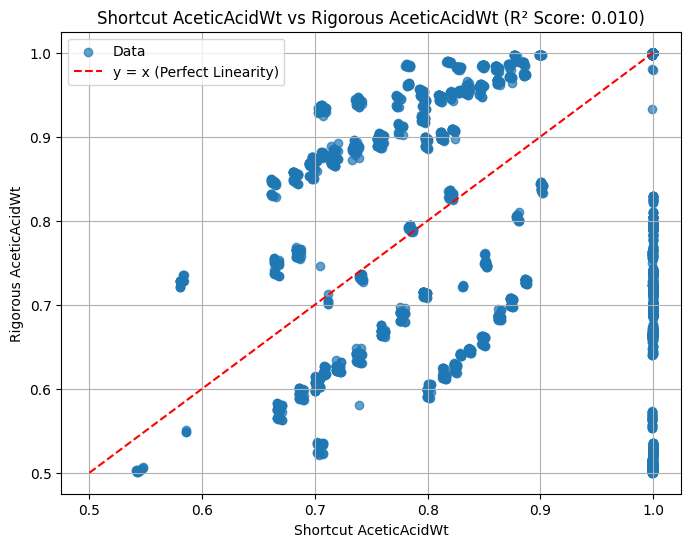

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Filter out invalid or NaN results for CAPEX
valid_results = results_df.dropna(subset=['Shortcut_AceticAcidWt', 'Rigorous_AceticAcidWt'])
valid_results = valid_results[(valid_results['Shortcut_AceticAcidWt'] > 0) & (valid_results['Rigorous_AceticAcidWt'] > 0.5) &
                                (valid_results['Shortcut_AceticAcidWt'] < 1) & (valid_results['Rigorous_AceticAcidWt'] < 1)]

# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_AceticAcidWt'], valid_results['Rigorous_AceticAcidWt'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_AceticAcidWt'].min(), valid_results['Rigorous_AceticAcidWt'].min())
max_val = min(valid_results['Shortcut_AceticAcidWt'].max(), valid_results['Rigorous_AceticAcidWt'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_AceticAcidWt']].values
y = valid_results['Rigorous_AceticAcidWt'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut AceticAcidWt')
plt.ylabel('Rigorous AceticAcidWt')
plt.title(f'Shortcut AceticAcidWt vs Rigorous AceticAcidWt (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


R² Score: 0.0000 (1.0이면 완전 선형, 0에 가까울수록 비선형)


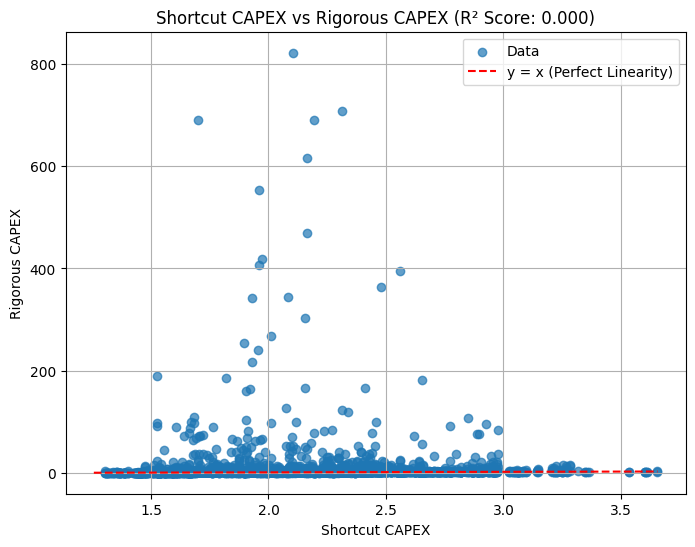

In [3]:
# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_CAPEX'], valid_results['Rigorous_CAPEX'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_CAPEX'].min(), valid_results['Rigorous_CAPEX'].min())
max_val = min(valid_results['Shortcut_CAPEX'].max(), valid_results['Rigorous_CAPEX'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_CAPEX']].values
y = valid_results['Rigorous_CAPEX'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut CAPEX')
plt.ylabel('Rigorous CAPEX')
plt.title(f'Shortcut CAPEX vs Rigorous CAPEX (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


R² Score: 0.8746 (1.0이면 완전 선형, 0에 가까울수록 비선형)


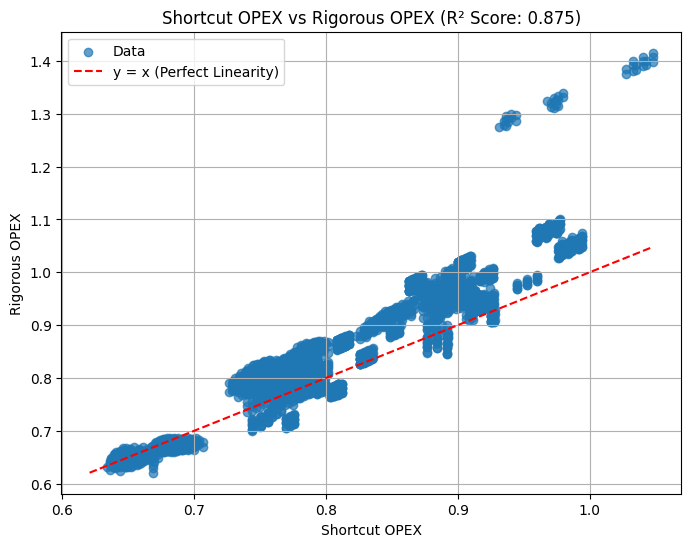

In [4]:
# Scatter plot for CAPEX
plt.figure(figsize=(8, 6))
plt.scatter(valid_results['Shortcut_OPEX'], valid_results['Rigorous_OPEX'], alpha=0.7, label="Data")

# Add y = x reference line (Perfect linearity)
min_val = min(valid_results['Shortcut_OPEX'].min(), valid_results['Rigorous_OPEX'].min())
max_val = min(valid_results['Shortcut_OPEX'].max(), valid_results['Rigorous_OPEX'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label="y = x (Perfect Linearity)")



# Calculate R² score to check linearity
X = valid_results[['Shortcut_OPEX']].values
y = valid_results['Rigorous_OPEX'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"R² Score: {r2:.4f} (1.0이면 완전 선형, 0에 가까울수록 비선형)")

plt.xlabel('Shortcut OPEX')
plt.ylabel('Rigorous OPEX')
plt.title(f'Shortcut OPEX vs Rigorous OPEX (R² Score: {r2:.3f})')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
valid_results

,Stages,_Lr1,_Hr1,_Lr2,_Hr2,_T_hex,_Lr3,_Hr3,Shortcut_CAPEX,Shortcut_OPEX,Shortcut_AceticAcidWt,Shortcut_BoilupRatio,Shortcut_SplitRatio,Shortcut_NumberStages,Shortcut_FeedStage,Shortcut_Time,Rigorous_CAPEX,Rigorous_OPEX,Rigorous_AceticAcidWt,Rigorous_Time
0,10.0,0.9500,0.9500,0.9500,0.95000,300.0,0.99990,0.95000,2.5601,0.7795,0.697454,2.871153,0.013807,22.0,17.0,4.599494,3.4224,0.8362,0.850190,16.926495
1,10.0,0.9500,0.9500,0.9500,0.95000,350.0,0.97495,0.99990,1.4485,0.8730,0.737271,4.809074,0.267223,10.0,8.0,4.847726,1.4810,0.9362,0.939633,34.737656
2,10.0,0.9500,0.9500,0.9500,0.95000,325.0,0.99990,0.97495,2.3886,0.6506,0.713874,3.166442,0.013807,22.0,17.0,4.480332,2.3961,0.6441,0.868548,38.693263
3,10.0,0.9500,0.9500,0.9500,0.95000,325.0,0.99990,0.95000,2.5664,0.6840,0.716334,3.171869,0.013807,22.0,17.0,4.398207,3.5395,0.6673,0.866484,38.833472
4,10.0,0.9500,0.9500,0.9500,0.95000,350.0,0.97495,0.97495,1.3558,0.7404,0.736039,4.820087,0.267071,10.0,8.0,4.421849,3.5445,0.7694,0.938321,49.551417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3758,50.0,0.9999,0.9999,0.9999,0.99990,350.0,0.95000,0.99990,2.1564,0.9132,0.999999,37.680021,0.328608,31.0,27.0,0.312009,303.0942,0.9660,0.758748,319.790068
3759,50.0,0.9999,0.9999,0.9999,0.99990,300.0,0.95000,0.95000,2.3781,0.9201,0.999999,36.948027,0.336296,31.0,26.0,0.287399,4.2286,1.0011,0.697695,549.564713
3760,50.0,0.9999,0.9999,0.9999,0.99990,325.0,0.95000,0.99990,2.1987,0.9119,0.999999,37.574357,0.332615,31.0,26.0,0.304128,4.3087,0.9442,0.727052,638.883610
3761,50.0,0.9999,0.9999,0.9999,0.95000,350.0,0.97495,0.95000,2.1301,0.8068,0.999999,36.613403,0.328604,31.0,27.0,0.526267,7.3234,0.7843,0.716087,1474.479994


## 리그레이션 모델링


In [10]:
def prepare_data(df):
    input_cols = ['Stages', '_Lr1', '_Hr1', '_Lr2', '_Hr2', '_T_hex', '_Lr3', '_Hr3']
    target_cols = [
        'Shortcut_CAPEX', 'Shortcut_OPEX', 'Shortcut_AceticAcidWt', 'Shortcut_BoilupRatio',
        'Shortcut_SplitRatio', 'Shortcut_NumberStages', 'Shortcut_FeedStage', 'Shortcut_Time',
        'Rigorous_CAPEX', 'Rigorous_OPEX', 'Rigorous_AceticAcidWt', 'Rigorous_Time'
    ]
    X = df[input_cols].values
    y = df[target_cols].values
    return X, y, target_cols

def run_linear_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return model, y_pred, mse, r2

def run_gaussian_process(X, y):
    kernel = C(1.0) * RBF(1.0)
    models = []
    predictions = []
    mses = []
    r2s = []

    for i in range(y.shape[1]):
        gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)
        gp.fit(X, y[:, i])
        y_pred = gp.predict(X)
        mse = mean_squared_error(y[:, i], y_pred)
        r2 = r2_score(y[:, i], y_pred)
        models.append(gp)
        predictions.append(y_pred)
        mses.append(mse)
        r2s.append(r2)

    return models, np.array(predictions).T, mses, r2s



In [12]:
# 사용 예시
if __name__ == "__main__":
    # 데이터프레임 불러오기 (예시)
    data = valid_results  # 또는 위에서 제공한 dict 기반으로 DataFrame 직접 생성
    X, y, target_cols = prepare_data(data)

    # Linear Regression
    lr_model, lr_preds, lr_mse, lr_r2 = run_linear_regression(X, y)
    print("[Linear Regression]")
    print(f"MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}")

    # Gaussian Process Regression
    gp_models, gp_preds, gp_mse_list, gp_r2_list = run_gaussian_process(X, y)
    print("\n[Gaussian Process Regression]")
    for i, col in enumerate(target_cols):
        print(f"{col}: MSE={gp_mse_list[i]:.4f}, R2={gp_r2_list[i]:.4f}")

[Linear Regression]
MSE: 2671.3148, R2: 0.4297
